In [1]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt

C:\Users\lzcai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [36]:
# Initialize Values
NUM_FEATURES = 36
NUM_CLASSES = 6
NUM_HIDDEN = 10

learning_rate = 0.01
epochs = 1000
batch_size = 32
num_neurons = 10
seed = 10
beta = pow(10, -6)
np.random.seed(seed)

train_file_name = 'sat_train.txt'
test_file_name = 'sat_test.txt'

In [22]:
def process_inputs_from_file(fileName): # Read in data
    inputs = np.loadtxt(fileName, delimiter=' ')
    X, _Y = inputs[:, :NUM_FEATURES], inputs[:, -1].astype(int)
    X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
    _Y[_Y == 7] = 6 # Actually dont have, just in case have error data

    Y = np.zeros((_Y.shape[0], NUM_CLASSES))
    Y[np.arange(_Y.shape[0]), _Y - 1] = 1 #one hot matrix
    return X, Y

In [23]:
trainX, trainY = process_inputs_from_file(train_file_name)
testX, textY = process_inputs_from_file(test_file_name)

In [11]:
train_input[0,:36]

array([ 92., 115., 120.,  94.,  84., 102., 106.,  79.,  84., 102., 102.,
        83., 101., 126., 133., 103.,  92., 112., 118.,  85.,  84., 103.,
       104.,  81., 102., 126., 134., 104.,  88., 121., 128., 100.,  84.,
       107., 113.,  87.])

In [13]:
train_input[0]

array([ 92., 115., 120.,  94.,  84., 102., 106.,  79.,  84., 102., 102.,
        83., 101., 126., 133., 103.,  92., 112., 118.,  85.,  84., 103.,
       104.,  81., 102., 126., 134., 104.,  88., 121., 128., 100.,  84.,
       107., 113.,  87.,   3.])

In [28]:
def init_weights (feature_no, neuron_no, logistic = True):
    # From eg.5.2
    n_in = feature_no
    n_out = neuron_no
    W_values = np.asarray(np.random.uniform(low=-np.sqrt(6. / (n_in + n_out)),
                                            high=np.sqrt(6. / (n_in + n_out)),
                                            size=(n_in, n_out)))
    if logistic == True:
        W_values *= 4
    return(tf.Variable(W_values, dtype=tf.float32))

In [29]:
def init_bias(neuron_no = 1):
    # From eg.5.2
    return(tf.Variable(np.zeros(neuron_no), dtype=tf.float32))

In [30]:
V = init_weights(NUM_HIDDEN, NUM_CLASSES)
c = init_bias(NUM_CLASSES)
W = init_weights(NUM_FEATURES, NUM_HIDDEN)
b = init_bias(NUM_HIDDEN)

In [42]:
x = tf.placeholder(tf.float32, trainX.shape)
d = tf.placeholder(tf.float32, trainY.shape)

z = tf.matmul(x, W) + b
h = tf.nn.sigmoid(z)
y = tf.matmul(h, V) + c

In [43]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, 
    logits=logits)
regularization = tf.nn.l2_loss(V) + tf.nn.l2_loss(W) 
J = tf.reduce_mean(cross_entropy + beta * regularization)

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(J)

In [45]:
correct_prediction = tf.cast(tf.equal(tf.argmax(logits, 1), 
                                      tf.argmax(y_, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

In [46]:
grad_u = -(d - y)
grad_V = tf.matmul(tf.transpose(h), grad_u)
grad_c = tf.reduce_sum(grad_u, axis=0)

In [47]:
dh = h*(1-h)
grad_z = tf.matmul(grad_u, tf.transpose(V))*dh
grad_W = tf.matmul(tf.transpose(x), grad_z)
grad_b = tf.reduce_sum(grad_z, axis=0)

In [49]:
W_new = W.assign(W - learning_rate*grad_W)
b_new = b.assign(b - learning_rate*grad_b)
V_new = V.assign(V - learning_rate*grad_V)
c_new = c.assign(c - learning_rate*grad_c)

In [50]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
global_step = tf.Variable(0, name='global_step', trainable=False)
train_op = optimizer.minimize(loss, global_step=global_step)

In [52]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
W_, b_ = sess.run([W, b])
print('W: {}, b: {}'.format(W_, b_))
V_, c_ = sess.run([V, c])
print('V:{}, c:{}'.format(V_, c_))

W: [[-1.598055  ]
 [ 0.03927797]
 [ 1.0071237 ]
 [ 0.36250824]
 [ 0.71439564]
 [-0.67048144]
 [ 1.3458798 ]
 [ 0.6912664 ]
 [ 0.13705876]
 [-1.1527667 ]
 [-0.40803894]
 [ 0.56097996]
 [-0.18738729]
 [-0.21257716]
 [ 0.3793921 ]
 [ 0.04232549]
 [ 0.4845119 ]
 [ 0.32550195]
 [ 0.9832915 ]
 [ 0.06973736]
 [ 1.3164824 ]
 [-0.5823398 ]
 [-1.3193552 ]
 [-0.64205456]
 [-1.2435683 ]
 [ 1.058863  ]
 [-1.4596957 ]
 [ 0.40684023]
 [ 0.15330113]
 [ 1.0285987 ]
 [-0.96985525]
 [ 1.1496108 ]
 [-0.4779083 ]
 [ 0.82036   ]
 [-0.65731937]
 [ 1.2368702 ]], b: [0.]
V:[[-2.2363157  1.9296366 -2.4507506 -3.0489862  1.3728788  3.3580854]], c:[0. 0. 0. 0. 0. 0.]


In [57]:
err = []
for i in range(epochs):
    sess.run([W_new, b_new, V_new, c_new], {x:trainX, d:trainY})
    cost_ = sess.run(J, {x:trainX, d:trainY})
    err.append(cost_)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,36]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,36], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Variable_2/read/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_9_Variable_2/read", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "C:\Users\lzcai\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lzcai\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\lzcai\Anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\lzcai\Anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\lzcai\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-cb8595337228>", line 2, in <module>
    x = tf.placeholder(tf.float32, [None, NUM_FEATURES])
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1735, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5928, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\lzcai\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,36]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,36], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[Node: Variable_2/read/_31 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_9_Variable_2/read", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [7]:
# Build the graph for the deep net

weights = tf.Variable(tf.truncated_normal([NUM_FEATURES, NUM_CLASSES],
                                          stddev=1.0/math.sqrt(float(NUM_FEATURES))),
                      name='weights')
biases  = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
logits  = tf.matmul(x, weights) + biases

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=logits)
loss = tf.reduce_mean(cross_entropy)

In [8]:
# Create the gradient descent optimizer with the given learning rate.
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

correct_prediction = tf.cast(tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_acc = []
    for i in range(epochs):
        train_op.run(feed_dict={x: trainX, y_: trainY})
        train_acc.append(accuracy.eval(feed_dict={x: trainX, y_: trainY}))

        if i % 100 == 0:
            print('iter %d: accuracy %g'%(i, train_acc[i]))

iter 0: accuracy 0.508
iter 100: accuracy 0.667
iter 200: accuracy 0.689
iter 300: accuracy 0.696
iter 400: accuracy 0.701
iter 500: accuracy 0.707
iter 600: accuracy 0.708
iter 700: accuracy 0.708
iter 800: accuracy 0.708
iter 900: accuracy 0.708


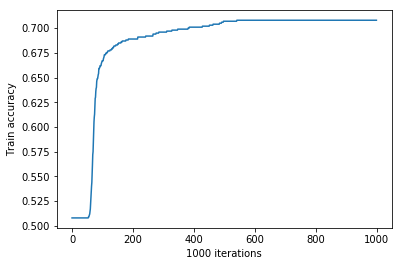

In [10]:
# plot learning curves
plt.figure(1)
plt.plot(range(epochs), train_acc)
plt.xlabel(str(epochs) + ' iterations')
plt.ylabel('Train accuracy')
plt.show()

creating the figures folder
x:[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]]
y:[[ 0.44351063 -0.41624786]
 [ 0.83554825  0.42915157]
 [ 0.08508874 -0.7156599 ]
 [-0.25331848  0.34826723]
 [-0.11633365 -0.13197201]
 [ 0.23553396  0.02627649]
 [ 0.30079436  0.20207791]
 [ 0.61044639  0.0432943 ]]
W: [[-3.9708016   1.1067251   0.41702417]
 [ 2.798091   -2.6382916   3.1272793 ]], b: [0. 0. 0.]
V:[[ 3.5812194 -1.5841355]
 [-3.5890346 -1.7465771]
 [-3.3828716  2.8804188]], c:[0. 0.]
iter: 1
z: [[-1.9101236  -0.16253823 -0.61367196]
 [ 0.9144167  -2.3479893   1.5225074 ]
 [-0.2872166  -0.9428108  -0.02146798]
 [ 2.4979675  -2.6936064   1.5449183 ]
 [ 0.44401816 -0.7876224  -0.43167958]
 [ 1.3873068  -2.8973703   2.1252968 ]
 [ 2.3901093  -2.1208277   0.80959386]
 [-0.15801382 -1.8291762   1.1268957 ]]
h: [[0.12896697 0.4594547  0.35122204]
 

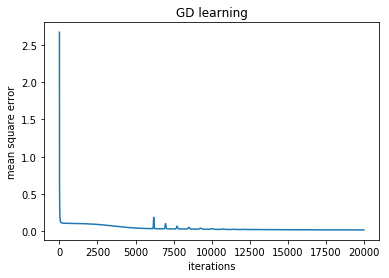

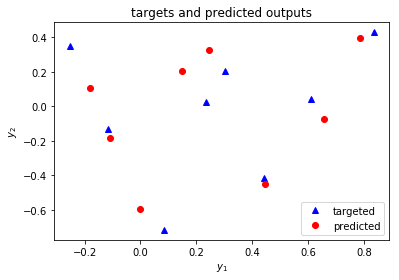

In [58]:
import tensorflow as tf
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import os
if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')
    
num_features = 2
num_labels = 2
num_hidden = 3
num_data = 8

lr = 0.05
num_iters = 20000

SEED = 10
np.random.seed(SEED)

# data
# generate training data
X = np.random.rand(num_data, num_features)
Y = 2*np.random.rand(num_data, num_labels) - 1

print('x:{}'.format(X))
print('y:{}'.format(Y))


# initialization routines for bias and weights
def init_bias(n = 1):
    return(tf.Variable(np.zeros(n), dtype=tf.float32))

def init_weights(n_in=1, n_out=1, logistic=True):
    W_values = np.asarray(np.random.uniform(low=-np.sqrt(6. / (n_in + n_out)),
                                            high=np.sqrt(6. / (n_in + n_out)),
                                            size=(n_in, n_out)))
    if logistic == True:
        W_values *= 4
    return(tf.Variable(W_values, dtype=tf.float32))

#Define variables:
V = init_weights(num_hidden, num_labels)
c = init_bias(num_labels)
W = init_weights(num_features, num_hidden)
b = init_bias(num_hidden)

# Model input and output
x = tf.placeholder(tf.float32, X.shape)
d = tf.placeholder(tf.float32, Y.shape)

z = tf.matmul(x, W) + b
h = tf.nn.sigmoid(z)
y = tf.matmul(h, V) + c


cost = tf.reduce_mean(tf.reduce_sum(tf.square(d - y),axis=1))


grad_u = -(d - y)
grad_V = tf.matmul(tf.transpose(h), grad_u)
grad_c = tf.reduce_sum(grad_u, axis=0)

dh = h*(1-h)
grad_z = tf.matmul(grad_u, tf.transpose(V))*dh
grad_W = tf.matmul(tf.transpose(x), grad_z)
grad_b = tf.reduce_sum(grad_z, axis=0)

W_new = W.assign(W - lr*grad_W)
b_new = b.assign(b - lr*grad_b)
V_new = V.assign(V - lr*grad_V)
c_new = c.assign(c - lr*grad_c)

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
W_, b_ = sess.run([W, b])
print('W: {}, b: {}'.format(W_, b_))
V_, c_ = sess.run([V, c])
print('V:{}, c:{}'.format(V_, c_))

err = []
for i in range(num_iters):
  sess.run([W_new, b_new, V_new, c_new], {x:X, d:Y})
  cost_ = sess.run(cost, {x:X, d:Y})
  err.append(cost_)

  if (i < 1):
    print('iter: {}'.format(i+1))
    z_, h_, y_, grad_u_, dh_, grad_z_, V_, c_, W_, b_ = sess.run([ z, h, y, grad_u, dh, grad_z, V, c, W, b], {x:X, d:Y})
    print('z: {}'.format(z_))
    print('h: {}'.format(h_))
    print('y: {}'.format(y_))
    print('grad_u: {}'.format(grad_u_))
    print('dh: {}'.format(dh_))
    print('grad_z:{}'.format(grad_z_))
    print('cost: {}'.format(cost_))
    print('V: {}, c: {}'.format(V_, c_))
    print('W: {}, b: {}'.format(W_, b_))
                    
  if not i%1000:
    print('epoch:{}, error:{}'.format(i,err[i]))
                    

y_ = sess.run(y, {x: X})
print('y:{}'.format(y_))

# plot learning curves
plt.figure(1)
plt.plot(range(num_iters), err)
plt.xlabel('iterations')
plt.ylabel('mean square error')
plt.title('GD learning')
plt.savefig('figures/5.2_1.png')

# plot trained and predicted points
plt.figure(2)
plot_targets = plt.plot(Y[:,0], Y[:,1], 'b^', label='targeted')
plot_pred = plt.plot(y_[:,0], y_[:,1], 'ro', label='predicted')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('targets and predicted outputs')
plt.legend()
plt.savefig('./figures/5.2_2.png')

plt.show()
